In [205]:
# Min-max normalization
import pandas as pd
import numpy as np
df=pd.read_csv("/Users/jaeeponde/IML_A1/IML_A1/trail_training_data.csv")
df

,MAKE,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,COEMISSIONS,FUEL_X,FUEL_Z,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_M5,FUEL CONSUMPTION
0,0.071429,0.048913,0.142857,0.111111,0.317136,1.0,0.0,0.0,0.0,1.0,11.2
1,0.571429,0.733696,0.528571,0.555556,0.710997,1.0,0.0,0.0,0.0,1.0,18.8
2,0.500000,0.733696,0.542857,0.555556,0.687980,1.0,0.0,0.0,0.0,1.0,18.9
3,0.357143,0.733696,0.514286,0.555556,0.705882,1.0,0.0,1.0,0.0,0.0,18.5
4,0.357143,0.733696,0.457143,0.333333,0.652174,1.0,0.0,1.0,0.0,0.0,17.3
...,...,...,...,...,...,...,...,...,...,...,...
506,0.285714,0.820652,0.471429,0.333333,0.629156,1.0,0.0,1.0,0.0,0.0,17.0
507,0.285714,0.733696,0.471429,0.333333,0.721228,1.0,0.0,0.0,0.0,1.0,18.7
508,0.357143,0.233696,0.285714,0.333333,0.416880,1.0,0.0,1.0,0.0,0.0,13.6
509,0.214286,0.016304,0.185714,0.111111,0.363171,0.0,1.0,0.0,0.0,1.0,12.6


In [206]:

# Shuffle the data and reset the index
df_shuffled = df.sample(frac=1).reset_index(drop=True)

# Define train-test split
train_size = 511 - 50  # 461 for training
train_data = df_shuffled.iloc[:train_size]  # Training data
test_data = df_shuffled.iloc[train_size:]   # Test data


# Extract features and target
X_train = train_data.drop(columns='FUEL CONSUMPTION').values
y_train = train_data['FUEL CONSUMPTION'].values
X_test = test_data.drop(columns='FUEL CONSUMPTION').values
y_test = test_data['FUEL CONSUMPTION'].values

In [207]:
X_train

array([[0.28571429, 0.01630435, 0.67142857, ..., 0.        , 0.        ,
        0.        ],
       [0.57142857, 0.5326087 , 0.32857143, ..., 1.        , 0.        ,
        0.        ],
       [0.21428571, 0.36956522, 0.11428571, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.28571429, 1.        , 0.47142857, ..., 1.        , 0.        ,
        0.        ],
       [0.07142857, 0.04891304, 0.14285714, ..., 1.        , 0.        ,
        0.        ],
       [0.57142857, 0.73369565, 0.52857143, ..., 0.        , 0.        ,
        1.        ]])

In [208]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Add Bias Term
def add_bias_term(X):
    return np.column_stack([np.ones(X.shape[0]), X])

# Step 2: Polynomial Feature Transformation
def polynomial_features(X, degree):
    poly_X = X.copy()
    for deg in range(2, degree + 1):
        poly_X = np.column_stack([poly_X, X ** deg])
    return poly_X

# Step 3: Initialize Weights
def initialize_weights(n_features):
    return np.random.randn(n_features)

# Step 4: Hypothesis Function
def hypothesis(X, weights):
    return np.dot(X, weights)

# Step 5: Mean Squared Error
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Step 6: RMSE
def rmse_loss(y_true, y_pred):
    return np.sqrt(mse_loss(y_true, y_pred))

# Step 7: R-squared (R²)
def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Step 8: Gradient Descent
def gradient_descent(X, y, weights, learning_rate, n_iterations):
    m = X.shape[0]
    for i in range(n_iterations):
        y_pred = hypothesis(X, weights)
        gradients = (1/m) * np.dot(X.T, (y_pred - y))
        weights = weights - learning_rate * gradients
        
        if i % 100 == 0:
            loss = mse_loss(y, y_pred)
            print(f"Iteration {i}: MSE = {loss:.4f}")
    return weights





In [209]:
# Step 9: Train the Model
degree = 3
X_train_poly = polynomial_features(X_train, degree)
X_train_bias = add_bias_term(X_train_poly)

n_features = X_train_bias.shape[1]
weights = initialize_weights(n_features)

learning_rate = 0.3
n_iterations = 1000

trained_weights = gradient_descent(X_train_bias, y_train, weights, learning_rate, n_iterations)

# Step 10: Test the Model on Training Data
y_train_pred = hypothesis(X_train_bias, trained_weights)

# Step 11: Test the Model on Testing Data
X_test_poly = polynomial_features(X_test, degree)
X_test_bias = add_bias_term(X_test_poly)

y_test_pred = hypothesis(X_test_bias, trained_weights)
test_loss=rmse_loss(y_test, y_test_pred)

print(f"Test MSE: {test_loss:.4f}")

Iteration 0: MSE = 182.8551
Iteration 100: MSE = 0.9931
Iteration 200: MSE = 0.7870
Iteration 300: MSE = 0.6612
Iteration 400: MSE = 0.5778
Iteration 500: MSE = 0.5212
Iteration 600: MSE = 0.4819
Iteration 700: MSE = 0.4539
Iteration 800: MSE = 0.4332
Iteration 900: MSE = 0.4176
Test MSE: 0.6743


Training MSE: 0.4054
Training RMSE: 0.6367
Training R²: 0.9599
Test MSE: 0.4547
Test RMSE: 0.6743
Test R²: 0.9466


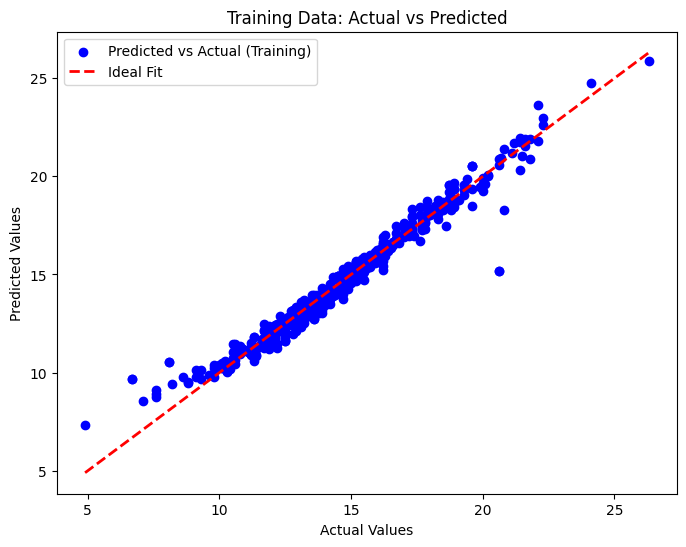

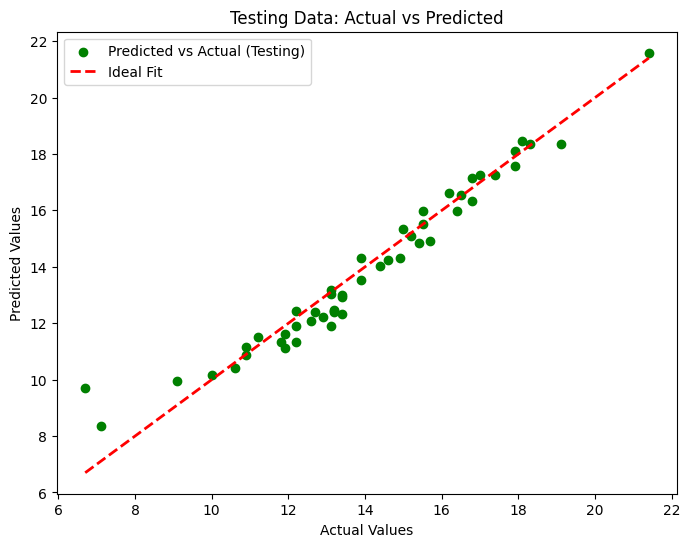

In [210]:
import matplotlib.pyplot as plt

# Step 12: Calculate Metrics for Training Data
train_mse = mse_loss(y_train, y_train_pred)
train_rmse = rmse_loss(y_train, y_train_pred)
train_r2 = r_squared(y_train, y_train_pred)

print(f"Training MSE: {train_mse:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Training R²: {train_r2:.4f}")

# Step 13: Calculate Metrics for Test Data
test_mse = mse_loss(y_test, y_test_pred)
test_rmse = rmse_loss(y_test, y_test_pred)
test_r2 = r_squared(y_test, y_test_pred)

print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")

# Step 14: Plot Actual vs Predicted for Training Data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Predicted vs Actual (Training)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training Data: Actual vs Predicted')
plt.legend()
plt.show()

# Step 15: Plot Actual vs Predicted for Testing Data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Predicted vs Actual (Testing)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Testing Data: Actual vs Predicted')
plt.legend()
plt.show()